# Item based collaborative filtering python

In [1]:
#importing neccesary packages
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Step 1 - Data Preparation

In [2]:
#Reading movielens data from 
#https://grouplens.org/datasets/movielens/
my_df = pd.read_csv('/content/ratings.csv', sep=',')

In [3]:
#Checking Data
my_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703.0
1,1,3,4.0,964981247.0
2,1,6,4.0,964982224.0
3,1,47,5.0,964983815.0
4,1,50,5.0,964982931.0


In [4]:
#Importing movie title and joining with main data
movie_titles = pd.read_csv('/content/movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
my_df = pd.merge(my_df, movie_titles, on='movieId')
my_df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
85266,553,5059,5.0,1.219560e+09,Little Dieter Needs to Fly (1997),Documentary
85267,553,5513,5.0,1.219561e+09,Martin Lawrence Live: Runteldat (2002),Comedy|Documentary
85268,553,7457,3.5,1.219557e+09,Breakin' All the Rules (2004),Comedy|Romance
85269,553,43684,4.5,1.219560e+09,Something New (2006),Comedy|Drama|Romance


In [6]:
my_df_new= my_df[['userId','movieId','rating','timestamp','title']]
my_df_new

,userId,movieId,rating,timestamp,title
0,1,1,4.0,9.649827e+08,Toy Story (1995)
1,5,1,4.0,8.474350e+08,Toy Story (1995)
2,7,1,4.5,1.106636e+09,Toy Story (1995)
3,15,1,2.5,1.510578e+09,Toy Story (1995)
4,17,1,4.5,1.305696e+09,Toy Story (1995)
...,...,...,...,...,...
85266,553,5059,5.0,1.219560e+09,Little Dieter Needs to Fly (1997)
85267,553,5513,5.0,1.219561e+09,Martin Lawrence Live: Runteldat (2002)
85268,553,7457,3.5,1.219557e+09,Breakin' All the Rules (2004)
85269,553,43684,4.5,1.219560e+09,Something New (2006)


# user_id - the ID of the user who rated the movie.
# movieId - the ID of the movie.
# rating - The rating the user gave the movie, between 1 and 5.
# timestamp - The time the movie was rated.
# title - The title of the movie.

# Step 2 - Data exploration

In [7]:
#Statitical features of the movie
my_df_new.describe()

,userId,movieId,rating,timestamp
count,85271.000000,85271.000000,85270.000000,8.527000e+04
mean,277.872641,19258.870847,3.523496,1.196058e+09
std,155.875583,35277.240853,1.040897,2.121931e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,140.000000,1196.000000,3.000000,1.014924e+09
50%,288.000000,2987.000000,3.500000,1.179164e+09
75%,414.000000,7892.500000,4.000000,1.421374e+09
max,554.000000,193609.000000,5.000000,1.537799e+09


In [8]:
#creating mean ratings data
ratings = pd.DataFrame(my_df_new.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0
'Tis the Season for Love (2015),1.5


In [9]:
#creating number of ratings data
ratings['number_of_ratings'] = my_df_new.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2
'Tis the Season for Love (2015),1.5,1


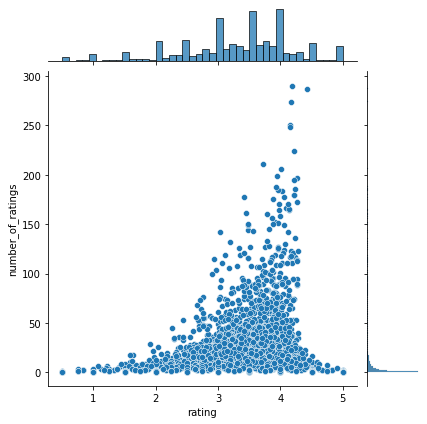

In [10]:
#Plotting the jointplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


# Creating User - Item interaction matrix

In [14]:
#creating the user-item interaction matrix
movie_matrix_UII = my_df_new.pivot_table(index='userId', columns='title', values='rating')
movie_matrix_UII.head()

title,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Most rated movies
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.181034,290
"Shawshank Redemption, The (1994)",4.419861,287
Pulp Fiction (1994),4.177007,274
"Matrix, The (1999)",4.152000,250
"Silence of the Lambs, The (1991)",4.151210,248
Star Wars: Episode IV - A New Hope (1977),4.216518,224
Jurassic Park (1993),3.722749,211
Braveheart (1995),4.014563,206
Terminator 2: Judgment Day (1991),3.949749,199


# Making recommendation - Example movie- FARGO

In [16]:
#Fetching ratings for Fargo
Fargo_user_rating = movie_matrix_UII['Fargo (1996)']

In [17]:
#Finding the correlation with different movies
similar_to_fargo=movie_matrix_UII.corrwith(Fargo_user_rating)

In [18]:
#Observing the result
similar_to_fargo.head()

title
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
'Tis the Season for Love (2015)           NaN
dtype: float64

# creating a threshold for minimum number of ratings

In [19]:
#creating dataframe to bring in #of ratings
corr_fargo = pd.DataFrame(similar_to_fargo, columns=['Correlation'])
corr_fargo.dropna(inplace=True)
corr_fargo.head()

,Correlation
title,
"'burbs, The (1989)",0.303488
(500) Days of Summer (2009),0.484683
*batteries not included (1987),0.500000
10 Cloverfield Lane (2016),0.426641
10 Things I Hate About You (1999),0.441321


In [20]:
#Bringining in ratings
corr_fargo = corr_fargo.join(ratings['number_of_ratings'])

corr_fargo.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.303488,14
(500) Days of Summer (2009),0.484683,39
*batteries not included (1987),0.500000,4
10 Cloverfield Lane (2016),0.426641,11
10 Things I Hate About You (1999),0.441321,44


In [21]:
corr_fargo[corr_fargo['number_of_ratings'] > 30].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Fargo (1996),1.000000,164
"Aviator, The (2004)",0.731334,31
Collateral (2004),0.686607,38
Zodiac (2007),0.658870,35
Stranger than Fiction (2006),0.632980,38
Boys Don't Cry (1999),0.626524,33
Willow (1988),0.613709,32
Road to Perdition (2002),0.605704,44
Platoon (1986),0.592195,54
